In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort nelson
Processing Record 2 of Set 1 | kadoma
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | uruzgan
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | rosita
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | tawau
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | samoded
Processing Record 17 of Set 1 | rochegda
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Set 1 | coahuayana
Processing Recor

Processing Record 38 of Set 4 | upernavik
Processing Record 39 of Set 4 | dingle
Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | guapi
Processing Record 42 of Set 4 | dongning
Processing Record 43 of Set 4 | xinzhou
Processing Record 44 of Set 4 | dylym
Processing Record 45 of Set 4 | sivaki
Processing Record 46 of Set 4 | ratnagiri
Processing Record 47 of Set 4 | zabol
Processing Record 48 of Set 4 | nome
Processing Record 49 of Set 4 | dharchula
Processing Record 50 of Set 4 | mahebourg
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | leiyang
Processing Record 3 of Set 5 | bilma
Processing Record 4 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 5 | los llanos de aridane
Processing Record 6 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 7 of Set 5 | surat thani
Processing Record 8 of Set 5 | bosaso
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 | gewane
Processing Re

Processing Record 26 of Set 8 | verkhnevilyuysk
Processing Record 27 of Set 8 | vigrestad
Processing Record 28 of Set 8 | grand centre
City not found. Skipping...
Processing Record 29 of Set 8 | thongwa
Processing Record 30 of Set 8 | victoria
Processing Record 31 of Set 8 | saldanha
Processing Record 32 of Set 8 | teknaf
Processing Record 33 of Set 8 | stege
Processing Record 34 of Set 8 | sataua
City not found. Skipping...
Processing Record 35 of Set 8 | sovetskaya gavan
Processing Record 36 of Set 8 | teluknaga
Processing Record 37 of Set 8 | warrnambool
Processing Record 38 of Set 8 | la palma
Processing Record 39 of Set 8 | privolzhye
Processing Record 40 of Set 8 | ilulissat
Processing Record 41 of Set 8 | selizharovo
Processing Record 42 of Set 8 | susner
Processing Record 43 of Set 8 | koboldo
City not found. Skipping...
Processing Record 44 of Set 8 | goure
Processing Record 45 of Set 8 | grajewo
Processing Record 46 of Set 8 | whitehorse
Processing Record 47 of Set 8 | saleau

Processing Record 15 of Set 12 | traverse city
Processing Record 16 of Set 12 | luganville
Processing Record 17 of Set 12 | punta alta
Processing Record 18 of Set 12 | lingao
Processing Record 19 of Set 12 | malatya
Processing Record 20 of Set 12 | benguela
Processing Record 21 of Set 12 | traralgon
Processing Record 22 of Set 12 | lolua
City not found. Skipping...
Processing Record 23 of Set 12 | altamira
Processing Record 24 of Set 12 | kutum
Processing Record 25 of Set 12 | laem sing
Processing Record 26 of Set 12 | polovinnoye
Processing Record 27 of Set 12 | sabha
Processing Record 28 of Set 12 | prainha
Processing Record 29 of Set 12 | zhovkva
Processing Record 30 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 12 | suntar
Processing Record 32 of Set 12 | saint-remi
Processing Record 33 of Set 12 | morro bay
Processing Record 34 of Set 12 | kindu
Processing Record 35 of Set 12 | margate
Processing Record 36 of Set 12 | tabiauea
City not found. Skipp

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Nelson,58.8053,-122.7002,20.48,70,100,3.06,CA,2022-04-18 01:08:18
1,Kadoma,34.7333,135.5833,68.67,46,100,4.38,JP,2022-04-18 01:08:18
2,Vaini,-21.2000,-175.2000,86.16,79,75,6.91,TO,2022-04-18 01:08:19
3,Bluff,-46.6000,168.3333,59.81,63,50,4.09,NZ,2022-04-18 01:08:19
4,Uruzgan,32.8333,66.0000,62.06,51,100,7.67,AF,2022-04-18 01:08:19
5,Kapaa,22.0752,-159.3190,80.58,79,40,18.41,US,2022-04-18 01:08:20
6,Rosita,13.9268,-84.4032,76.69,83,95,4.94,NI,2022-04-18 01:08:20
7,Kudahuvadhoo,2.6708,72.8944,83.91,65,19,10.98,MV,2022-04-18 01:08:21
8,Ushuaia,-54.8000,-68.3000,46.06,93,100,10.36,AR,2022-04-18 01:08:21
9,Lata,40.1629,-8.3327,58.82,98,40,1.39,PT,2022-04-18 01:08:21


In [19]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fort Nelson,CA,2022-04-18 01:08:18,58.8053,-122.7002,20.48,70,100,3.06
1,Kadoma,JP,2022-04-18 01:08:18,34.7333,135.5833,68.67,46,100,4.38
2,Vaini,TO,2022-04-18 01:08:19,-21.2000,-175.2000,86.16,79,75,6.91
3,Bluff,NZ,2022-04-18 01:08:19,-46.6000,168.3333,59.81,63,50,4.09
4,Uruzgan,AF,2022-04-18 01:08:19,32.8333,66.0000,62.06,51,100,7.67
5,Kapaa,US,2022-04-18 01:08:20,22.0752,-159.3190,80.58,79,40,18.41
6,Rosita,NI,2022-04-18 01:08:20,13.9268,-84.4032,76.69,83,95,4.94
7,Kudahuvadhoo,MV,2022-04-18 01:08:21,2.6708,72.8944,83.91,65,19,10.98
8,Ushuaia,AR,2022-04-18 01:08:21,-54.8000,-68.3000,46.06,93,100,10.36
9,Lata,PT,2022-04-18 01:08:21,40.1629,-8.3327,58.82,98,40,1.39


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

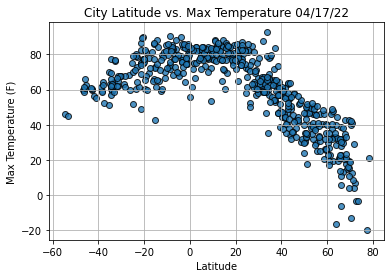

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

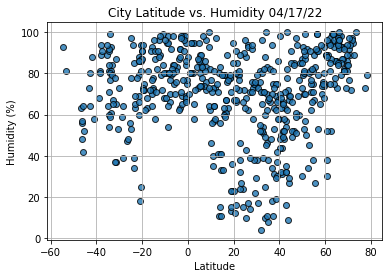

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

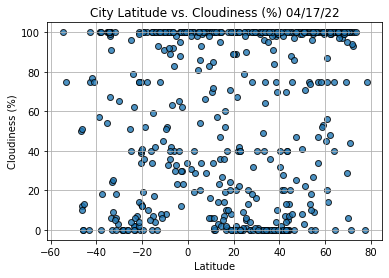

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

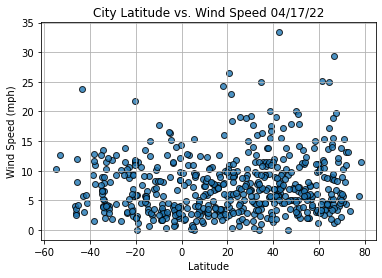

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
          
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()